In [1]:
import sys
sys.path.append("/Users/adam/work/brick/jwst/brick-jwst-2221/analysis")
sys.path.append("/Users/adam/work/brick/jwst/brick-jwst-2221/reduction")

In [2]:
pwd

'/Users/adam/work/brick/jwst/brick-jwst-2221/notebooks'

In [3]:
from paths import basepath

In [15]:
%run $basepath/analysis/selections.py --module=merged1182

/Users/adam/work/brick/jwst/brick-jwst-2221/analysis/selections.py:23: DeprecationWarning: `photutils.CircularAperture` is a deprecated alias for `photutils.aperture.CircularAperture` and will be removed in the future. Instead, please use `from photutils.aperture import CircularAperture` to silence this warning.
  from photutils import CircularAperture, EPSFBuilder, find_peaks, CircularAnnulus
/Users/adam/work/brick/jwst/brick-jwst-2221/analysis/selections.py:23: DeprecationWarning: `photutils.EPSFBuilder` is a deprecated alias for `photutils.psf.EPSFBuilder` and will be removed in the future. Instead, please use `from photutils.psf import EPSFBuilder` to silence this warning.
  from photutils import CircularAperture, EPSFBuilder, find_peaks, CircularAnnulus
/Users/adam/work/brick/jwst/brick-jwst-2221/analysis/selections.py:23: DeprecationWarning: `photutils.find_peaks` is a deprecated alias for `photutils.detection.find_peaks` and will be removed in the future. Instead, please use `fr

Selecting module merged1182

merged-reproject
760 saturated in near_saturated_f212n_f212n
53 saturated in near_saturated_f466n_f466n
241 saturated in near_saturated_f405n_f405n
444 saturated in near_saturated_f187n_f187n
4876 saturated in near_saturated_f182m_f182m
7361 near saturated out of 487201.  That leaves 479840 not near unsaturated
88 saturated in replaced_saturated_f212n
13 saturated in replaced_saturated_f466n
52 saturated in replaced_saturated_f405n
34 saturated in replaced_saturated_f187n
338 saturated in replaced_saturated_f182m
539 saturated out of 487201.  That leaves 486662 unsaturated
Filter f410m has qf=140561, spread=140845, fracflux=102909 ok, totaling 102342.  There are 487201 total, of which 353504 are masked and 133697 are unmasked. qfmasksum=344533, inverse=142668.
Filter f212n has qf=310359, spread=312169, fracflux=236464 ok, totaling 236077.  There are 487201 total, of which 178334 are masked and 308867 are unmasked. qfmasksum=173856, inverse=313345.
Filter f4

In [21]:
(blue_405_410 & long_good).sum()

0

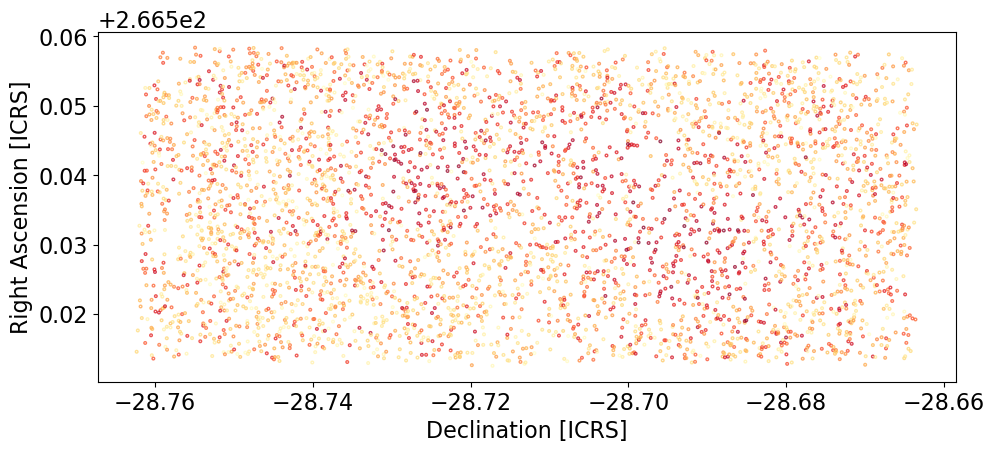

In [30]:
pl.figure(figsize=(20,10))
ax = pl.subplot(2,1,1, adjustable='box', aspect=0.88)

crds = basetable['skycoord_f410m']
sel = basetable['sep_f405n'].quantity < 0.1*u.arcsec
sel &= (~any_saturated) & (any_good)
#sel &= basetable['mag_ab_f410m'] < 18.5
sel &= blue_405_410b
xx,yy = ww410.world_to_pixel(crds[sel])

colorby = basetable['mag_ab_f182m'] - basetable['mag_ab_f410m']
colorby = basetable['mag_ab_f410m']

colornorm = simple_norm(colorby[sel], stretch='linear')
cmap = 'YlOrRd'

scat = ax.scatter(
                  crds.dec[sel],
                  crds.ra[sel],
                  c=colorby[sel],
                  s=3.5,
                  alpha=0.75,
                  norm=colornorm,
                  cmap=cmap)

pl.draw()
colors = scat.get_facecolors()
scat.set_edgecolors(colors)
scat.set_facecolors('none')
ax.axis()
ax.set_ylabel("Right Ascension [ICRS]")
ax.set_xlabel("Declination [ICRS]");

(16.272535848617554, 8.256985139846801)

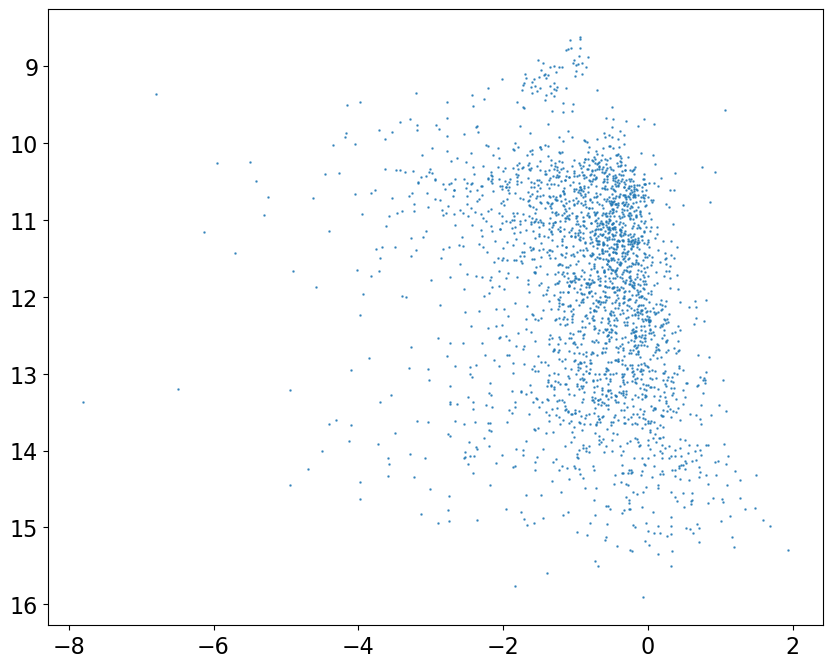

In [34]:
sc = pl.scatter((basetable['mag_ab_f405n'] - basetable['mag_ab_f444w'])[sel],
                (basetable['mag_ab_f405n'])[sel],
                 s=2.5, alpha=0.75,
                 marker='.',
                 #c=colorby[sel],
                 #norm=colornorm, cmap=cmap
                )
pl.ylim(pl.ylim()[::-1])

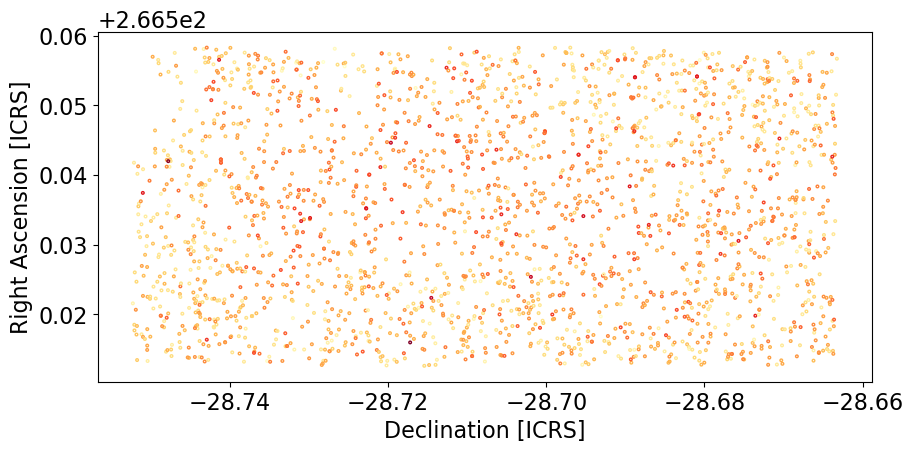

In [37]:
pl.figure(figsize=(20,10))
ax = pl.subplot(2,1,1, adjustable='box', aspect=0.88)

crds = basetable['skycoord_f410m']
sel = basetable['sep_f405n'].quantity < 0.1*u.arcsec
sel &= (~any_saturated) & (any_good)
#sel &= basetable['mag_ab_f410m'] < 18.5
sel &= basetable['mag_ab_f405n'] - basetable['mag_ab_f444w'] < -2
xx,yy = ww410.world_to_pixel(crds[sel])

colorby = basetable['mag_ab_f182m'] - basetable['mag_ab_f410m']
colorby = basetable['mag_ab_f410m']
colorby = basetable['mag_ab_f444w']

colornorm = simple_norm(colorby[sel], stretch='linear')
cmap = 'YlOrRd'

scat = ax.scatter(
                  crds.dec[sel],
                  crds.ra[sel],
                  c=colorby[sel],
                  s=3.5,
                  alpha=1,
                  norm=colornorm,
                  cmap=cmap)

pl.draw()
colors = scat.get_facecolors()
scat.set_edgecolors(colors)
scat.set_facecolors('none')
ax.axis()
ax.set_ylabel("Right Ascension [ICRS]")
ax.set_xlabel("Declination [ICRS]");

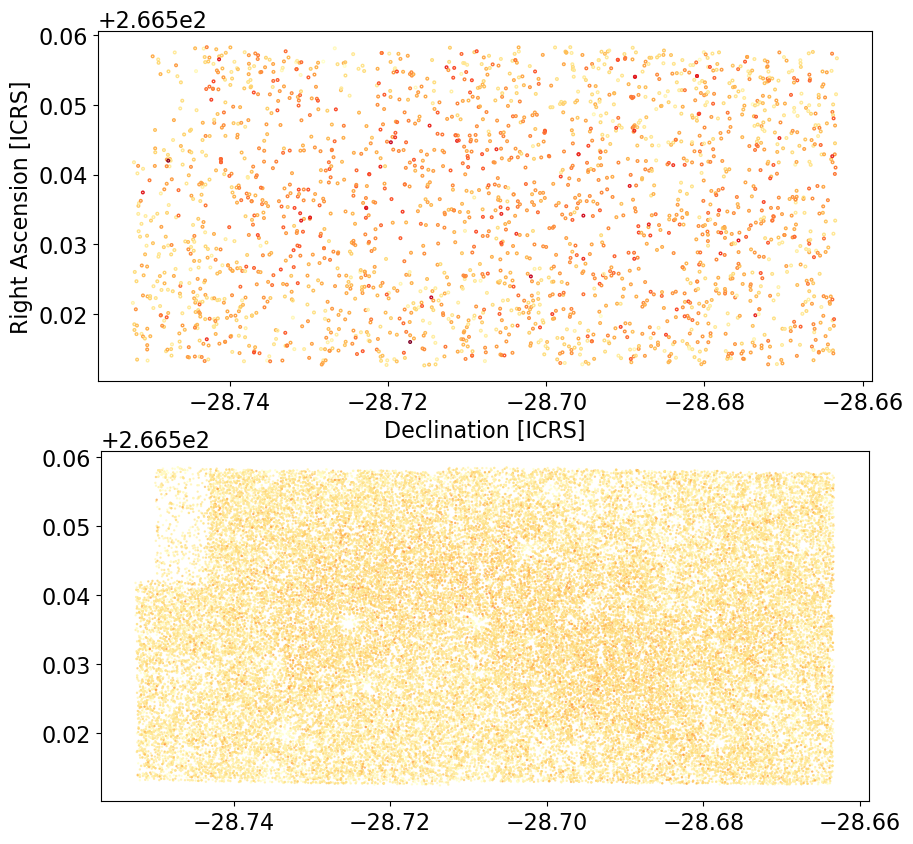

In [43]:
pl.figure(figsize=(20,10))
ax = pl.subplot(2,1,1, adjustable='box', aspect=0.88)
ax2 = pl.subplot(2,1,2, adjustable='box', aspect=0.88)

crds = basetable['skycoord_f410m']
sel = basetable['sep_f405n'].quantity < 0.1*u.arcsec
sel &= (~any_saturated) & (any_good)
#sel &= basetable['mag_ab_f410m'] < 18.5
colsel = basetable['mag_ab_f405n'] - basetable['mag_ab_f444w'] < -2
sel &= colsel
xx,yy = ww410.world_to_pixel(crds[sel])

colorby = basetable['mag_ab_f182m'] - basetable['mag_ab_f410m']
colorby = basetable['mag_ab_f410m']
colorby = basetable['mag_ab_f444w']

colornorm = simple_norm(colorby[sel], stretch='linear')
cmap = 'YlOrRd'

scat = ax.scatter(
                  crds.dec[sel],
                  crds.ra[sel],
                  c=colorby[sel],
                  s=3.5,
                  alpha=1,
                  norm=colornorm,
                  cmap=cmap)

pl.draw()
colors = scat.get_facecolors()
scat.set_edgecolors(colors)
scat.set_facecolors('none')
ax.axis()
ax.set_ylabel("Right Ascension [ICRS]")
ax.set_xlabel("Declination [ICRS]");

sel2 = basetable['sep_f405n'].quantity < 0.1*u.arcsec
sel2 &= (~any_saturated) & (any_good)
sel2 &= ~colsel
scat = ax2.scatter(
                  crds.dec[sel2],
                  crds.ra[sel2],
                  c=colorby[sel2],
                  s=0.5,
                  alpha=0.75,
                  norm=colornorm,
                  cmap=cmap)

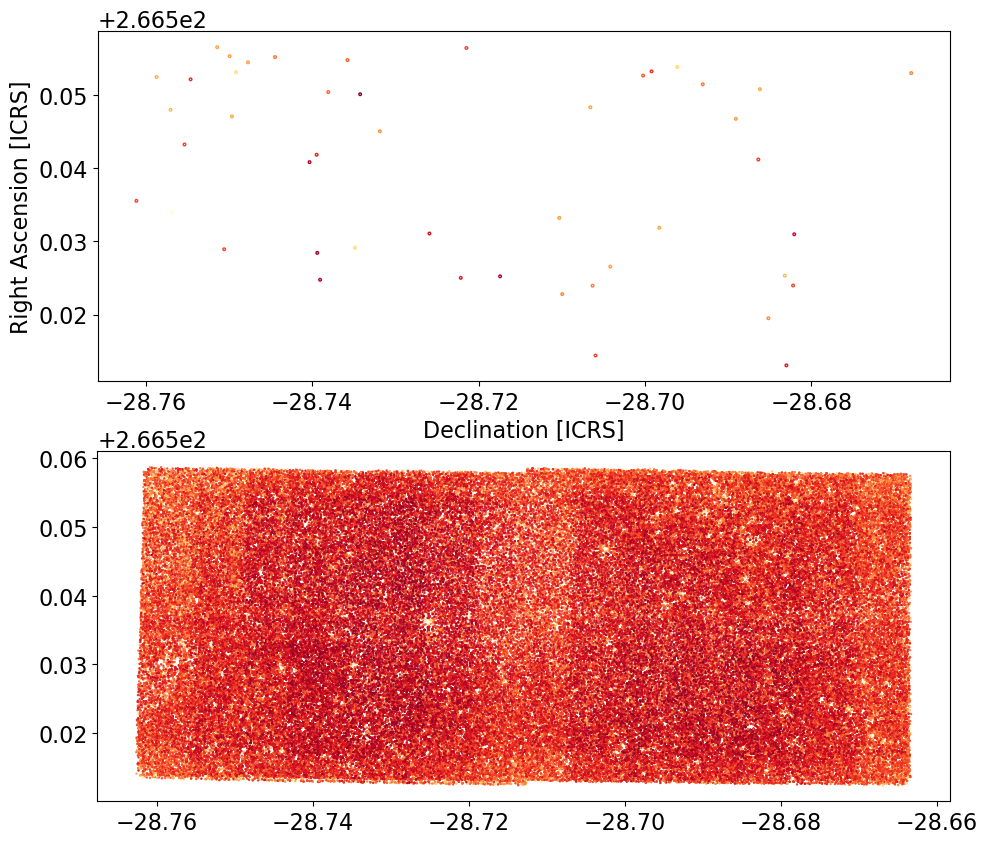

In [48]:
pl.figure(figsize=(20,10))
ax = pl.subplot(2,1,1, adjustable='box', aspect=0.88)
ax2 = pl.subplot(2,1,2, adjustable='box', aspect=0.88)

crds = basetable['skycoord_f410m']
sel = basetable['sep_f405n'].quantity < 0.1*u.arcsec
sel &= (~any_saturated) & (any_good)
#sel &= basetable['mag_ab_f410m'] < 18.5
colsel = (basetable['mag_ab_f187n'] - basetable['mag_ab_f182m'] < -1) & (basetable['mag_ab_f405n'] - basetable['mag_ab_f410m'] < 0)
sel &= colsel
xx,yy = ww410.world_to_pixel(crds[sel])

colorby = basetable['mag_ab_f182m'] - basetable['mag_ab_f410m']
colorby = basetable['mag_ab_f410m']
colorby = basetable['mag_ab_f212n']

colornorm = simple_norm(colorby[sel], stretch='linear')
cmap = 'YlOrRd'

scat = ax.scatter(
                  crds.dec[sel],
                  crds.ra[sel],
                  c=colorby[sel],
                  s=3.5,
                  alpha=1,
                  norm=colornorm,
                  cmap=cmap)

pl.draw()
colors = scat.get_facecolors()
scat.set_edgecolors(colors)
scat.set_facecolors('none')
ax.axis()
ax.set_ylabel("Right Ascension [ICRS]")
ax.set_xlabel("Declination [ICRS]");

sel2 = basetable['sep_f405n'].quantity < 0.1*u.arcsec
sel2 &= (~any_saturated) & (any_good)
sel2 &= ~colsel
scat = ax2.scatter(
                  crds.dec[sel2],
                  crds.ra[sel2],
                  c=colorby[sel2],
                  s=0.5,
                  alpha=0.75,
                  norm=colornorm,
                  cmap=cmap)